# Lab 3: Clustering Analysis Using K-Means

- **Course**: Advanced Big Data and Data Mining
- **Student**: Nicolas Ferradas Bertoli

## Step 1: Load and Prepare Dataset
- For this I need to prepare the data set by loading the `load_wine` dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [2]:

X.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:

X['target'] = y
X['target'].value_counts()


target
1    71
0    59
2    48
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop('target', axis=1))

## Step 2: Implement K-Means Clustering
- Implement the K-Means algorithm with k = 3 (since the Wine dataset has 3 classes). 
- Train the model and obtain the cluster labels. 
- Calculate the following performance metrics: 
- Silhouette Score (to measure how well-defined the clusters are). 
- Adjusted Rand Index (ARI) (to compare the clusters with the actual class labels). 

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

kmeans_sil, kmeans_ari

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.2848589191898987, 0.8974949815093207)

## Step 3: Implement K-Medoids Clustering
- Implement the K-Medoids algorithm with k = 3. 
- Train the model and obtain the cluster labels. 
- Calculate the same performance metrics as in Step 2. 

### Installing required packages
- Before I run any commands, I will need to import the `KMedoids` package. After some research I know I can get it from the `sklearn_extra` package which I can get by installing the `scikit-learn-extra` 

In [9]:
!pip install scikit-learn-extra


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

kmedoids_sil = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

kmedoids_sil, kmedoids_ari

(0.2676220575785755, 0.7411365432162113)

## Step 4:Visualize and compare results
- Create side-by-side scatter plots for both the K-Means and K-Medoids clusters. 
- Mark the cluster centroids/medoids on the plots for visual clarity. 
- Provide a brief analysis comparing the results: 

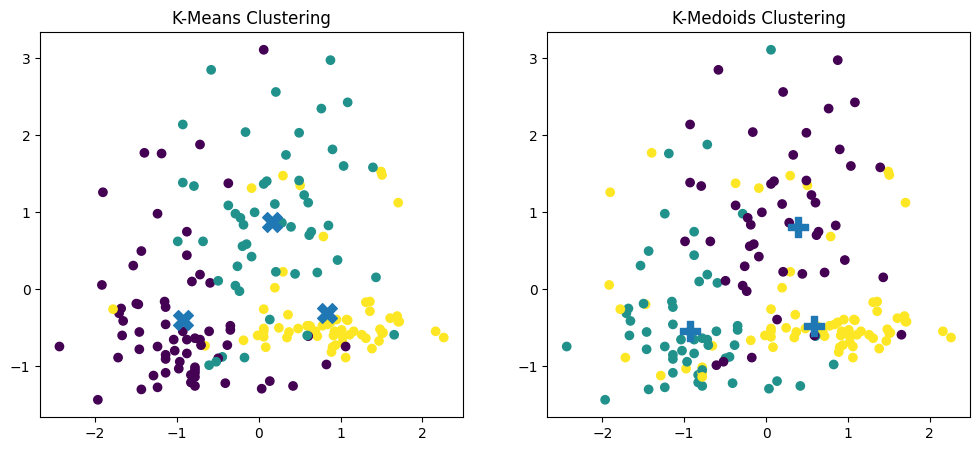

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=200)
plt.title("K-Means Clustering")

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmedoids_labels)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], marker='P', s=200)
plt.title("K-Medoids Clustering")

plt.show()

## Analysis of K-Means and K-Medoids Scatter Plots

The scatter plots compare how K-Means and K-Medoids grouped the wine samples into three clusters using the first two standardized features of the Wine dataset. Each point represents a wine sample, and each color corresponds to the cluster assigned by the algorithm. The center markers (X for K-Means and P for K-Medoids) show the representative point for each cluster.

### K-Means Clustering (Left Chart)

- K-Means forms three clusters that look more spherical and evenly shaped, which is typical since the algorithm minimizes the squared distance between points and their centroid.
- The large X markers represent the centroids. These are computed as the mean of all points assigned to the cluster.
- Centroids do not have to be real data points, so they appear at the exact center of the cluster’s mass.
- The clusters appear smooth and balanced, which fits the behavior of K-Means when the data is well spread out.

**Interpretation:**  
K-Means captures the overall structure of the dataset and tends to form clean clusters. However, it may be influenced by outliers or points that lie far from the dense regions of the data.

### K-Medoids Clustering (Right Chart)

- K-Medoids uses actual data points as its cluster centers, represented by the P markers.
- Because each medoid must be a real point, the centers may not visually appear as centrally located as centroids in K-Means.
- Some points near the boundaries shift to different clusters compared to K-Means, highlighting the differences in how the algorithms measure distances and select centers.
- The clusters appear slightly less smooth, which reflects the algorithm’s focus on robustness to noise rather than perfect visual symmetry.

**Interpretation:**  
K-Medoids is more resistant to outliers and noise. Even though the clusters may not look as clean as those from K-Means, it tends to produce stable clusters when the dataset has irregular shapes or potential noisy points.

### Comparison Between K-Means and K-Medoids

#### 1. Cluster Centers
- **K-Means:** Uses centroids (mean of points), which creates smooth, well-centered clusters.
- **K-Medoids:** Uses medoids (actual data points), which may appear slightly off-center.

#### 2. Cluster Shapes
- **K-Means:** More rounded and symmetric clusters.
- **K-Medoids:** Less symmetric grouping, but more robust to noise.

#### 3. Sensitivity
- **K-Means:** Sensitive to outliers because centroids can be pulled toward extreme points.
- **K-Medoids:** More stable and less affected by outliers.

#### 4. Differences in Assignments
Some points are colored differently between the two charts. These are boundary points where the algorithms disagree. This is expected since both algorithms optimize clustering differently.

#### 5. Overall Interpretation
Both methods identified three core groups in the data, but K-Means produced cleaner and smoother clusters while K-Medoids delivered more robust and noise-resistant groupings. K-Means is usually preferable when clusters are expected to be spherical and the data is well-behaved, while K-Medoids is better when the dataset contains noise, outliers, or non-standard shapes.